In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv")

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

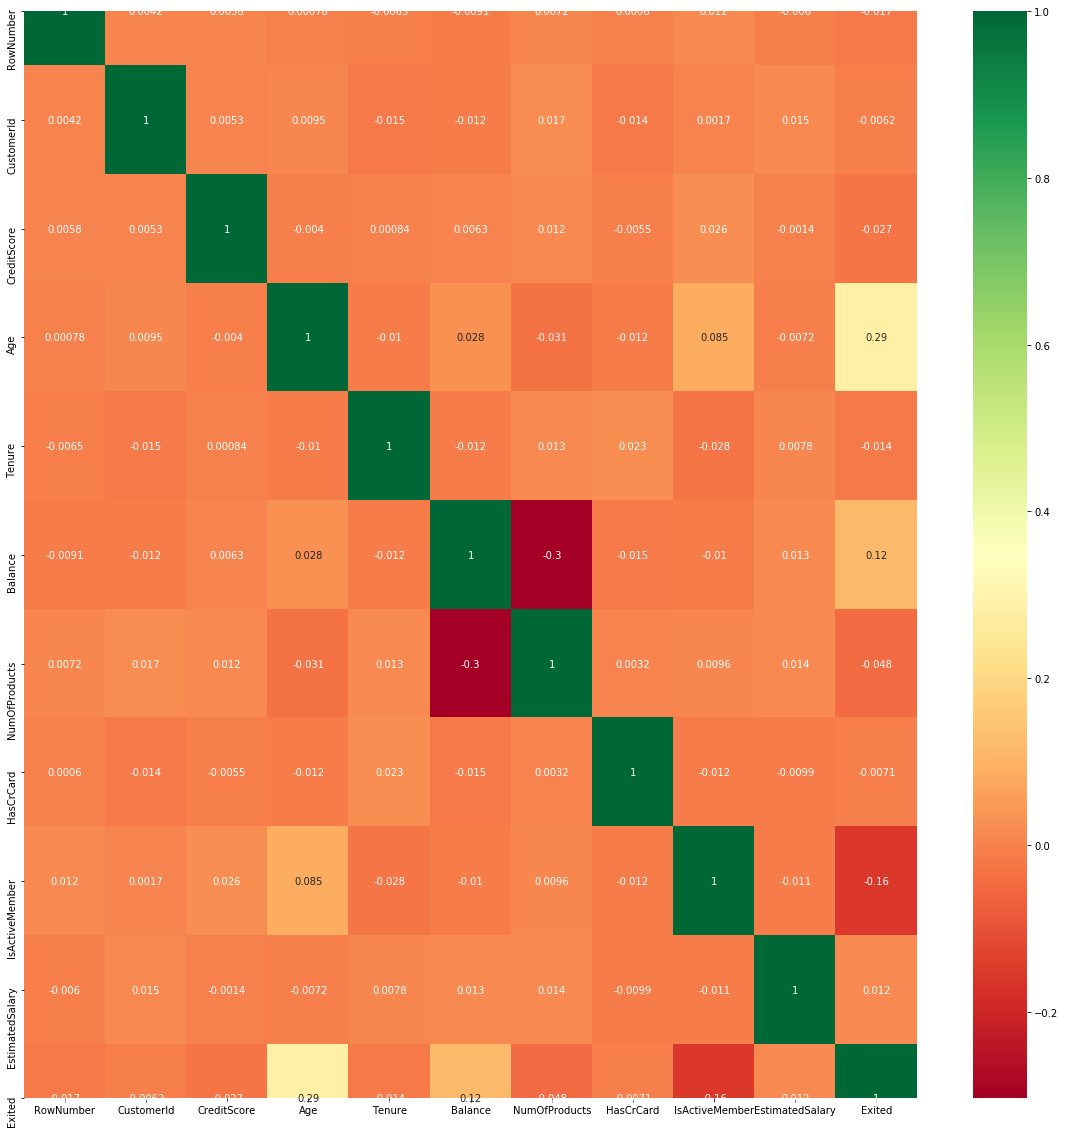

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot=True)

In [46]:
x = df.iloc[:, 3:-1]
y= df['Exited']

In [47]:
geo = pd.get_dummies(x['Geography'], drop_first = True)
gen = pd.get_dummies(x['Gender'], drop_first = True)

In [48]:
x = x.drop(['Geography', 'Gender'], axis = 1)

In [52]:
x= pd.concat([x, geo, gen], axis=1)

In [53]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [54]:
import xgboost

In [55]:
from sklearn.model_selection import train_test_split,  cross_val_score, RandomizedSearchCV, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state = 0)

In [56]:
params = {
    "learning_rate" : [0.05, 0.01, 0.1, 0.23, 0.15, 0.4],
    "max_depth"     : [3, 4, 5, 6, 8, 10, 12, 15, 17],
    "min_child_weight": [1, 3, 5, 7],
    "gamma"   : [0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [60]:
classifier = xgboost.XGBClassifier()

In [61]:
random_search = RandomizedSearchCV(classifier, params, n_iter = 5, scoring = "roc_auc", n_jobs=-1, cv = 5, verbose=3)

In [62]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [64]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.5min remaining:   27.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.5min finished



 Time taken: 0 hours 1 minutes and 33.64 seconds.


In [65]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [66]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [70]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [71]:
score = cross_val_score(classifier, x, y, cv=10)

In [72]:
score.mean()

0.8609